In [132]:
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore', UserWarning)

In [133]:
data=pd.read_csv("ex1data1.txt",names=['X','y'])

In [134]:
data.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [135]:
def plotData(x, y):
    fig, ax = plt.subplots() # create empty figure
    ax.plot(x,y,'rx',markersize=10)
    ax.set_xlabel("Population of City in 10,000s")
    ax.set_ylabel("Profit in $10,000s")
    return fig

In [136]:
def normal_eqn(X,y):
    return np.dot((np.linalg.inv(np.dot(X.T,X))),np.dot(X.T,y))

In [137]:
def GradientDescentMulti(X,y, theta, alpha, num_iters):
    m=len(y)
    j=np.zeros(num_iters)
    for i in range(num_iters):
        theta=theta-(alpha/m)*np.sum((np.dot(X,theta)-y)[:,None]*X,axis=0)
        j[i]=computeCost(X,y,theta)
        print("cost function",j[i])
    return (theta,j)


In [138]:
def GradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    j=np.zeros(num_iters)
    for i in range(num_iters):
        theta=theta-(aplha/m)*np.sum((np.dot(X,theta)-y)[:,None]*X,axis=0)
        j[i]=computeCost(X,y,theta)
        print("cost function",j[i])
    return (theta,j)

In [139]:
def FeatureNormalize(X):
    return np.divide((X-np.mean(X,axis=0)),np.std(X,axis=0))

In [140]:
def computeCost(X,y,theta):
    m=len(y)
    j=1/(2*m)*(np.sum((np.dot(X,theta)-y))**2)
    return j

In [141]:
print('Running warmUpExercise ... \n')
print('5x5 Identity Matrix: \n')

Running warmUpExercise ... 

5x5 Identity Matrix: 



In [142]:
x=np.array(data.X)[:,None]
y=np.array(data.y)

Program paused. Press enter to continue.

Running Gradient Descent ...



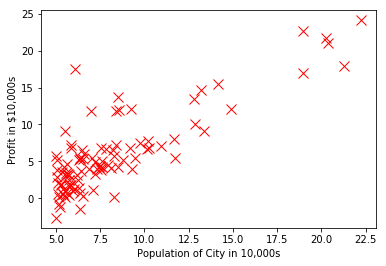

In [143]:
fig=plotData(x,y)
fig.show()
input('Program paused. Press enter to continue.\n')
print('Running Gradient Descent ...\n')

In [144]:
ones=np.ones_like(x) #array of 1's
X=np.hstack((ones,x))
theta=np.zeros(2) # initializing theta with zeros
iterations=1500
alpha=0.01
computeCost(X,y,theta)

1653.631660284588

In [145]:
theta,hist=GradientDescent(X,y,theta,alpha,iterations)

cost function 9.823005659322938
cost function 12.461099861207897
cost function 22.158761281912472
cost function 24.100561988059596
cost function 24.38172875528021
cost function 24.359494216311845
cost function 24.283399908854538
cost function 24.197999504096856
cost function 24.111206489743765
cost function 24.024424398746618
cost function 23.937901357065346
cost function 23.85168046702258
cost function 23.765768454056737
cost function 23.68016559210723
cost function 23.59487101365394
cost function 23.509883651932743
cost function 23.425202408112778
cost function 23.34082618094971
cost function 23.25675387203501
cost function 23.172984386715935
cost function 23.08951663424707
cost function 23.006349527805426
cost function 22.923481984481665
cost function 22.840912925266736
cost function 22.75864127503811
cost function 22.676665962545776
cost function 22.594985920398344
cost function 22.513600085048978
cost function 22.432507396781887
cost function 22.351706799698178
cost function 22.27

cost function 1.3203302305142879
cost function 1.3155744772190057
cost function 1.3108358538726776
cost function 1.3061142987741485
cost function 1.3014097504446336
cost function 1.2967221476267048
cost function 1.2920514292835856
cost function 1.2873975345984092
cost function 1.2827604029733308
cost function 1.278139974028734
cost function 1.2735361876025908
cost function 1.2689489837494314
cost function 1.2643783027398867
cost function 1.2598240850595224
cost function 1.2552862714084108
cost function 1.2507648027002212
cost function 1.246259620061402
cost function 1.2417706648304458
cost function 1.237297878557166
cost function 1.2328412030019398
cost function 1.2284005801348519
cost function 1.223975952135063
cost function 1.2195672613900004
cost function 1.2151744504946127
cost function 1.2107974622505302
cost function 1.2064362396655108
cost function 1.2020907259525833
cost function 1.197760864529259
cost function 1.1934465990169036
cost function 1.1891478732399512
cost function 1

In [146]:
print('Theta found by gradient descent: ')
print(theta[0],"\n", theta[1])

Theta found by gradient descent: 
-3.63029143940436 
 1.166362350335582


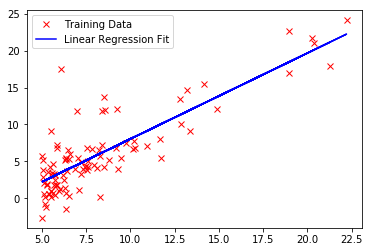

In [147]:
#plot linear regression fit line:
plt.plot(x,y,"rx",x,np.dot(X,theta),"b-")
plt.legend(["Training Data","Linear Regression Fit"])
plt.show()

In [148]:
# Predict values for population sizes of 35,000 and 70,000
predict1=np.dot([1,3.5],theta)
print('For population = 35,000, we predict a profit of ', predict1*10000)

For population = 35,000, we predict a profit of  4519.7678677017675


In [149]:
predict2 = np.dot([1, 7],theta)
print('For population = 70,000, we predict a profit of ', predict2*10000)
input('Program paused. Press enter to continue.\n');
print('Visualizing J(theta_0, theta_1) ...\n')

For population = 70,000, we predict a profit of  45342.45012944714
Program paused. Press enter to continue.

Visualizing J(theta_0, theta_1) ...



In [150]:
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
j_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

In [151]:
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        j_vals[i][j]=computeCost(X,y,t)

In [152]:
print('Loading data ...','\n')
print('Plotting Data ...','\n')
data = pd.read_csv("ex1data2.txt",names=["b_size","bedrooms","price"])
s = np.array(data.b_size)
r = np.array(data.bedrooms)
p = np.array(data.price)
m = len(r) 
s = np.vstack(s)
r = np.vstack(r)
X = np.hstack((s,r))
print('First 10 examples from the dataset: \n')
print(" size = ", s[:10],"\n"," bedrooms = ", r[:10], "\n")
input('Program paused. Press enter to continue.\n')
print('Normalizing Features ...\n')

Loading data ... 

Plotting Data ... 

First 10 examples from the dataset: 

 size =  [[2104]
 [1600]
 [2400]
 [1416]
 [3000]
 [1985]
 [1534]
 [1427]
 [1380]
 [1494]] 
  bedrooms =  [[3]
 [3]
 [3]
 [2]
 [4]
 [4]
 [3]
 [3]
 [3]
 [3]] 

Program paused. Press enter to continue.

Normalizing Features ...



Running gradient descent ...

cost function 2669006655561.0757
cost function 2615893423115.4097
cost function 2563837143995.413
cost function 2512816784829.905
cost function 2462811730811.789
cost function 2413801777368.6357
cost function 2365767121998.9985
cost function 2318688356271.219
cost function 2272546457981.421
cost function 2227322783467.592
cost function 2182999060076.5867
cost function 2139557378781.0618
cost function 2096980186943.319
cost function 2055250281223.148
cost function 2014350800626.806
cost function 1974265219694.333
cost function 1934977341822.4158
cost function 1896471292720.1492
cost function 1858731513995.0183
cost function 1821742756866.5178
cost function 1785490076004.875
cost function 1749958823492.3782
cost function 1715134642904.8794
cost function 1681003463511.0718
cost function 1647551494587.2024
cost function 1614765219844.9163
cost function 1582631391970.0022
cost function 1551137027269.7986
cost function 1520269400427.1296
cost function 1490016039

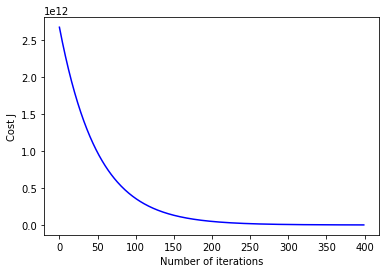

In [153]:
X = FeatureNormalize(X)
X = np.hstack((np.ones_like(s),X))

print('Running gradient descent ...\n')
alpha = 0.05
num_iters = 400
theta = np.zeros(3)

# Multiple Dimension Gradient Descent
theta, hist = GradientDescent(X, p, theta, alpha, num_iters)

# Plot convergence graph
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(np.arange(len(hist)),hist ,'-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()




In [154]:
print('Theta computed from gradient descent: \n')
print(theta,'\n')



Theta computed from gradient descent: 

[334302.06399328  99411.44947359   3267.01285407] 



In [156]:
# Estimate the price of a 1650 sq-ft, 3 br house
#the first column of X is all-ones.it doesnot need to be normalized.
normalized_specs = np.array([1,((1650-s.mean())/s.std()),((3-r.mean())/r.std())])
price = np.dot(normalized_specs,theta) 
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ',
      price)
input('Program paused. Press enter to continue.\n')

print('Solving with normal equations...\n')

data = pd.read_csv("ex1data2.txt",names=["sz","bed","price"])
s = np.array(data.sz)
r = np.array(data.bed)
p = np.array(data.price)
m = len(r) 
s = np.vstack(s)
r = np.vstack(r)
X = np.hstack((s,r))
X = np.hstack((np.ones_like(s),X))

theta = normal_eqn(X, p)

print('Theta computed from the normal equations: \n')
print(theta)
print('\n')

# Estimate the price of a 1650 sq-ft, 3 br house
price = np.dot([1,1650,3],theta) 


print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): \n',
price)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
  289221.5473712181
Program paused. Press enter to continue.

Solving with normal equations...

Theta computed from the normal equations: 

[89597.9095428    139.21067402 -8738.01911233]


Predicted price of a 1650 sq-ft, 3 br house (using normal equations): 
 293081.4643348931
